# Mating scenarios

Tom Ellis, April 2017

These simulations aim to test how well FAPS performs as we vary the quality of genotype information and sample size under four contrasting scenarios:

1. Even sibship sizes
2. Many small sibships
3. A single large sibship
4. Very large families
5. Reproductive skew (where a single sire dominates the family).

For these simulations, we'll assume sampling of the adults population is complete, but vary the number of loci, adult population size and genotype error rates ($\mu$). In each simulation allele frequencies are drawn from a uniform distribition between 0.25 and 0.5. I have not varied genotype dropout rates because these ought to be equivalent to reducing the effective number of loci by approximately 3-times the drop out rate, which is straightforward.

We'll use the same set of parameters for each scenario, and assess each possible combination:

In [1]:
import numpy as np
from faps import *
# packages for plotting the results:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# Common simulation parameters
r            = 300 # number of replicates
nloci        = [30,40,50,60,70,80,90,100] # number of loci
allele_freqs = [0.25, 0.5] # draw allele frequencies 
nadults      = [100, 250, 500, 1000, 2000] # size of the adults population
mu           = [0.0015, 0.005, 0.01, 0.015] #genotype error rates

Populating the interactive namespace from numpy and matplotlib


## 1. Even sibship sizes

### Simulation setup

This cell runs simulations for four full-sib families, each containing five offspring. The argument `return_clusters` tells FAPS to also export the `sibshipCluster` objects for each simulation. Since simulations are time consuming, we'll save the results so we can come back to them later.

In [ ]:
sires     = 4
offspring = 5

np.random.seed(614)
eventab, evenclusters = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, return_clusters=True, verbose=True)
even_famsizes = np.array([evenclusters[i].family_size() for i in range(len(evenclusters))])
even_famsizes = pd.DataFrame(even_famsizes)

# save data tables
eventab.to_csv('../data_files/eventab.csv', index=False)
even_famsizes.to_csv('../data_files/even_famsizes.csv', index=False)

300 of each parameter combination will be performed.
Simulating arrays with multiple number of loci: [30, 40, 50, 60, 70, 80, 90, 100].
Drawing allele frequencies between 0.25 and 0.5.
Simulating adult populations of multiple sizes: [100, 250, 500, 1000, 2000].
Simulating 4 families of 5 offspring.
0% of per-locus genotypes will be removed at random.
Multiple real genotyping error rates: [0.0015, 0.005, 0.01, 0.015].
Constructing paternity arrays using multiple input values for assumed genotype-error rate: [0.0015, 0.005, 0.01, 0.015].
No candidates to be removed.
Constructing paternity arrays assuming complete sampling of candidates.
Self-fertilisation rate of 0.
Performing 1000 Monte Carlo draws for sibship inference.

Parameters set. Beginning simulations on Sat Oct 28 16:10:39 2017.


Widget Javascript not detected.  It may not be installed or enabled properly.


Simulations completed after 321.04 minutes.


### Accuracy of partition inference

First, lets plot how FAPS performs as we increase the number of loci and the genotype error rate for different number of different candidate fathers. The following code plots three measures of accuracy:

1. The probability that the true partition was identified by the clustering algorithm in the set of plausible partitions.
2. The mean posterior probability that true full siblings are identified as full siblings.
3. The mean posterior probability of paternity for the true sire of each individual. 

For simplicity I have shown only $\mu=0.0015$ on the left-hand side and 50 loci on the right-hand side, which represent realistic values for our Antirrhinum dataset.

In [3]:
even_famsizes = pd.read_csv('../data_files/even_famsizes.csv')

In [7]:
eventab = pd.read_csv('../data_files/eventab.csv')

fig = plt.figure(figsize=(11.2/2.54, 20/2.54))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ticksize = 7
mux = ['$1.5e^{-3}$', '$5.0e^{-3}$', "$1.0e^{-2}$","$1.5e^{-2}$"]
# Vary number of loci
yv = eventab[eventab.mu_input == 0.0015].groupby(['n_adults', 'nloci']).mean()

nlpart = fig.add_subplot(4,2,1)
nlpart.tick_params(axis='both', which='major', labelsize=ticksize)
nlpart.set_xlim(28, 102)
nlpart.set_ylim(0.8, 1.01)
nlpart.set_ylabel('$P_{partition}$')
nlpart.plot(nloci, yv.partition_found[ 0:8 ], '-ok', label='100')
nlpart.plot(nloci, yv.partition_found[ 8:16], '-*k', label='250')
nlpart.plot(nloci, yv.partition_found[16:24], '-^k', label='500')
nlpart.plot(nloci, yv.partition_found[24:32], '-Dk', label='1000')
nlpart.plot(nloci, yv.partition_found[32:40], '-sk', label='2000')
nlpart.legend(loc='lower right', fontsize=7)
#nlpart.grid(axis='y')
nlpart.annotate('A', xy = [40,1], xytext=[33,0.82])


nlsibs = fig.add_subplot(4,2,3)
nlsibs.tick_params(axis='both', which='major', labelsize=ticksize)
nlsibs.set_ylim(0.5, 1.05)
nlsibs.set_xlim(28, 102)
nlsibs.set_ylabel('$P_{full}$')
nlsibs.plot(nloci, yv.acc_fs[ 0:8 ], '-ok')
nlsibs.plot(nloci, yv.acc_fs[ 8:16], '-*k')
nlsibs.plot(nloci, yv.acc_fs[16:24], '-^k')
nlsibs.plot(nloci, yv.acc_fs[24:32], '-Dk')
nlsibs.plot(nloci, yv.acc_fs[32:40], '-sk')
#nlsibs.grid(axis='y')
nlsibs.annotate('C', xy = [95,1], xytext=[93,0.54])

nlsire = fig.add_subplot(4,2,5)
nlsire.tick_params(axis='both', which='major', labelsize=ticksize)
nlsire.set_xlim(28, 102)
nlsire.set_ylim(0.7, 1.02)
nlsire.set_xlabel('Number of loci')
nlsire.set_ylabel('$P_{sire}$')
nlsire.plot(nloci, yv.prob_sires[ 0:8 ], '-ok')
nlsire.plot(nloci, yv.prob_sires[ 8:16], '-*k')
nlsire.plot(nloci, yv.prob_sires[16:24], '-^k')
nlsire.plot(nloci, yv.prob_sires[24:32], '-Dk')
nlsire.plot(nloci, yv.prob_sires[32:40], '-sk')
#nlsire.grid(axis='y')
nlsire.annotate('E', xy = [95,1], xytext=[93,0.72])

# Vary genotype error rate
yv = eventab[eventab.nloci == 50].groupby(['n_adults', 'mu_input']).mean()

mupart = fig.add_subplot(4,2,2)
mupart.tick_params(axis='both', which='major', labelsize=ticksize)
mupart.set_ylim(0.8, 1.01)
mupart.plot(mu, yv.partition_found[ 0:4 ], '-ok')
mupart.plot(mu, yv.partition_found[ 4:8 ], '-*k')
mupart.plot(mu, yv.partition_found[ 8:12], '-^k')
mupart.plot(mu, yv.partition_found[12:16], '-Dk')
mupart.plot(mu, yv.partition_found[16:20], '-sk')
mupart.set_xticks(mu)
mupart.set_xticklabels(mux)
#mupart.grid(axis='y')
mupart.annotate('B', xy = [0.01,1], xytext=[0.013,0.82])

musibs = fig.add_subplot(4,2,4)
musibs.tick_params(axis='both', which='major', labelsize=ticksize)
musibs.set_ylim(0.5, 1.05)
musibs.plot(mu, yv.acc_fs[ 0:4 ], '-ok')
musibs.plot(mu, yv.acc_fs[ 4:8 ], '-*k')
musibs.plot(mu, yv.acc_fs[ 8:12], '-^k')
musibs.plot(mu, yv.acc_fs[12:16], '-Dk')
musibs.plot(mu, yv.acc_fs[16:20], '-sk')
musibs.set_xticks(mu)
musibs.set_xticklabels(mux)
#musibs.grid(axis='y')
musibs.annotate('D', xy = [0.01,1], xytext=[0.013,0.54])

musire = fig.add_subplot(4,2,6)
musire.tick_params(axis='both', which='major', labelsize=ticksize)
musire.set_ylim(0.7, 1.02)
musire.set_xlabel('Genotype error rate')
musire.plot(mu, yv.prob_sires[ 0:4 ], '-ok')
musire.plot(mu, yv.prob_sires[ 4:8 ], '-*k')
musire.plot(mu, yv.prob_sires[ 8:12], '-^k')
musire.plot(mu, yv.prob_sires[12:16], '-Dk')
musire.plot(mu, yv.prob_sires[16:20], '-sk')
musire.set_xticks(mu)
musire.set_xticklabels(mux)
#musire.grid(axis='y', which='both')
musire.annotate('F', xy = [0.01,1], xytext=[0.013,0.72])

plt.savefig('../figures/accuracy_evensibships.eps', bbox_inches='tight', pad_inches=0.1)

The plots show that predictive power increases as we include more loci, as error rates decrease, and when the pool of candidate fathers is smaller. This is what we would expect of course.

Using $\mu=0.0015$, 60 loci are sufficient to recover the true partition with 100% reliability, but in fact even 30 loci are sufficient >90% of the time. This depends very little on genotype error rate, and only drops slightly when error rates are very high.

FAPS correctly inferred a true half-sibling relationship in all cases (data not shown). 50 loci suffice to estimate full-sibling relationships and identify true sires with >95% accuracy, and to recover posterior probabilities of paternity for the true sires as consistently close to one. This is true even when the number of candidates is very large.

Using 40 loci, FAPS is able to identify the true partition almost all the time, but the true partition structure and identity of the sires are less certain. Since FAPS is intended to deal with exactly this kind of uncertainty, we will focus on cases with 40 loci in future examples.

### Inference of family size

We can also ask how well FAPS predicts the distribution of family sizes. This cell plots the posterior distribution of family size as:

1. Number of loci varies, with $\mu$=0.0015 and 250 candidates
2. $\mu$ varies, with 50 loci and 250 candidates
3. Number of candidates varies, with $\mu$=0.0015 and 50 loci.

50 loci represents relatively few loci, but gives good separation between points. 

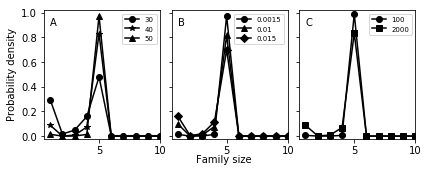

In [77]:
plotcodes = ['-ok','-*k','-^k','-Dk','-sk']

fig = plt.figure(figsize=(16.9/2.54, 6/2.54))
fig.subplots_adjust(wspace=0.1, hspace=0.05)
fig.text(0.5, 0.00, 'Family size', ha='center', va='center')

ax = fig.add_subplot(1,3,1)
ax.set_xlabel('')
ax.set_ylabel('Probability density')
#ax.set_title('A. Number of loci', fontsize=10)
ax.set_xlim(0.5,10)
ax.set_ylim(-0.02,1.02)
for i in [0,1,2]:
    ix = np.array((eventab.mu_input == 0.0015) & (eventab.nloci == nloci[i]) & (eventab.n_adults == 250))
    ax.plot(range(1,21), even_famsizes[ix].mean(0), plotcodes[i], label=nloci[i])
ax.legend(loc='upper right', fontsize=7)
#ax.grid(axis='y')
ax.annotate('A', xy=[1,1], xytext=[1,0.9])

bx = fig.add_subplot(1,3,2)
#bx.set_title('B. Error rate', fontsize=10)
bx.set_yticklabels('')
bx.set_xlim(0.5,10)
bx.set_ylim(-0.02,1.02)
for i in [0,2,3]:
    ix = np.array((eventab.mu_input == mu[i]) & (eventab.nloci == 50) & (eventab.n_adults == 250))
    bx.plot(range(1,21), even_famsizes[ix].mean(0), plotcodes[i], label=mu[i])
bx.legend(loc='upper right', fontsize=7)
#bx.grid(axis='y')
bx.annotate('B', xy=[1,1], xytext=[1,0.9])

cx = fig.add_subplot(1,3,3)
cx.set_yticklabels('')
#cx.set_title('C. Candidate fathers', fontsize=10)
cx.set_xlim(0.5,10)
cx.set_ylim(-0.02,1.02)
for i in [0,4]:
    ix = np.array((eventab.mu_input == 0.0015) & (eventab.nloci == 50) & (eventab.n_adults == nadults[i]))
    cx.plot(range(1,21), even_famsizes[ix].mean(0), plotcodes[i], label=nadults[i])
cx.legend(loc='upper right', fontsize=7)
cx.annotate('C', xy=[1,1], xytext=[1,0.9])

plt.savefig('../figures/famsizes_evensibships.eps', bbox_inches='tight', pad_inches=0.1)

## 2. No sibship structure

In [2]:
sires     = 20
offspring = 1

np.random.seed(78)
manytab, manyclusters = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, return_clusters=True, verbose=True)
many_famsizes = np.array([manyclusters[i].family_size() for i in range(len(manyclusters))])
many_famsizes = pd.DataFrame(many_famsizes)

# Save simulation results to disk.
manytab.to_csv('../data_files/manytab.csv', index=False)
many_famsizes.to_csv('../data_files/many_famsizes.csv', index=False)

300 of each parameter combination will be performed.
Simulating arrays with multiple number of loci: [30, 40, 50, 60, 70, 80, 90, 100].
Drawing allele frequencies between 0.25 and 0.5.
Simulating adult populations of multiple sizes: [100, 250, 500, 1000, 2000].
Simulating 20 families of 1 offspring.
0% of per-locus genotypes will be removed at random.
Multiple real genotyping error rates: [0.0015, 0.005, 0.01, 0.015].
Constructing paternity arrays using multiple input values for assumed genotype-error rate: [0.0015, 0.005, 0.01, 0.015].
No candidates to be removed.
Constructing paternity arrays assuming complete sampling of candidates.
Self-fertilisation rate of 0.
Performing 1000 Monte Carlo draws for sibship inference.

Parameters set. Beginning simulations on Fri Nov 17 09:28:39 2017.


/usr/local/lib/python2.7/dist-packages/faps/sibshipCluster.py:166: RuntimeWarning: invalid value encountered in double_scalars
  dev = dev.sum() / ix.sum()


Simulations completed after 438.7 minutes.


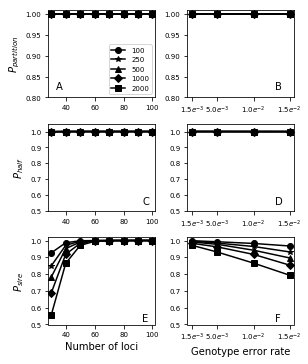

In [14]:
manytab = pd.read_csv('../data_files/manytab.csv')

fig = plt.figure(figsize=(11.2/2.54, 20/2.54))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ticksize = 7
mux = ['$1.5e^{-3}$', '$5.0e^{-3}$', "$1.0e^{-2}$","$1.5e^{-2}$"]
# Vary number of loci
yv = manytab[manytab.mu_input == 0.0015].groupby(['n_adults', 'nloci']).mean()

nlpart = fig.add_subplot(4,2,1)
nlpart.tick_params(axis='both', which='major', labelsize=ticksize)
nlpart.set_xlim(28, 102)
nlpart.set_ylim(0.8, 1.01)
nlpart.set_ylabel('$P_{partition}$')
nlpart.plot(nloci, yv.partition_found[ 0:8 ], '-ok', label='100')
nlpart.plot(nloci, yv.partition_found[ 8:16], '-*k', label='250')
nlpart.plot(nloci, yv.partition_found[16:24], '-^k', label='500')
nlpart.plot(nloci, yv.partition_found[24:32], '-Dk', label='1000')
nlpart.plot(nloci, yv.partition_found[32:40], '-sk', label='2000')
nlpart.legend(loc='lower right', fontsize=7)
#nlpart.grid(axis='y')
nlpart.annotate('A', xy = [40,1], xytext=[33,0.82])


nlsibs = fig.add_subplot(4,2,3)
nlsibs.tick_params(axis='both', which='major', labelsize=ticksize)
nlsibs.set_ylim(0.5, 1.05)
nlsibs.set_xlim(28, 102)
nlsibs.set_ylabel('$P_{half}$')
nlsibs.plot(nloci, yv.acc_hs[ 0:8 ], '-ok')
nlsibs.plot(nloci, yv.acc_hs[ 8:16], '-*k')
nlsibs.plot(nloci, yv.acc_hs[16:24], '-^k')
nlsibs.plot(nloci, yv.acc_hs[24:32], '-Dk')
nlsibs.plot(nloci, yv.acc_hs[32:40], '-sk')
#nlsibs.grid(axis='y')
nlsibs.annotate('C', xy = [95,1], xytext=[93,0.54])

nlsire = fig.add_subplot(4,2,5)
nlsire.tick_params(axis='both', which='major', labelsize=ticksize)
nlsire.set_xlim(28, 102)
nlsire.set_ylim(0.5, 1.02)
nlsire.set_xlabel('Number of loci')
nlsire.set_ylabel('$P_{sire}$')
nlsire.plot(nloci, yv.prob_sires[ 0:8 ], '-ok')
nlsire.plot(nloci, yv.prob_sires[ 8:16], '-*k')
nlsire.plot(nloci, yv.prob_sires[16:24], '-^k')
nlsire.plot(nloci, yv.prob_sires[24:32], '-Dk')
nlsire.plot(nloci, yv.prob_sires[32:40], '-sk')
#nlsire.grid(axis='y')
nlsire.annotate('E', xy = [95,1], xytext=[93,0.52])

# Vary genotype error rate
yv = manytab[manytab.nloci == 50].groupby(['n_adults', 'mu_input']).mean()

mupart = fig.add_subplot(4,2,2)
mupart.tick_params(axis='both', which='major', labelsize=ticksize)
mupart.set_ylim(0.8, 1.01)
mupart.plot(mu, yv.partition_found[ 0:4 ], '-ok')
mupart.plot(mu, yv.partition_found[ 4:8 ], '-*k')
mupart.plot(mu, yv.partition_found[ 8:12], '-^k')
mupart.plot(mu, yv.partition_found[12:16], '-Dk')
mupart.plot(mu, yv.partition_found[16:20], '-sk')
mupart.set_xticks(mu)
mupart.set_xticklabels(mux)
#mupart.grid(axis='y')
mupart.annotate('B', xy = [0.01,1], xytext=[0.013,0.82])

musibs = fig.add_subplot(4,2,4)
musibs.tick_params(axis='both', which='major', labelsize=ticksize)
musibs.set_ylim(0.5, 1.05)
musibs.plot(mu, yv.acc_hs[ 0:4 ], '-ok')
musibs.plot(mu, yv.acc_hs[ 4:8 ], '-*k')
musibs.plot(mu, yv.acc_hs[ 8:12], '-^k')
musibs.plot(mu, yv.acc_hs[12:16], '-Dk')
musibs.plot(mu, yv.acc_hs[16:20], '-sk')
musibs.set_xticks(mu)
musibs.set_xticklabels(mux)
#musibs.grid(axis='y')
musibs.annotate('D', xy = [0.01,1], xytext=[0.013,0.54])

musire = fig.add_subplot(4,2,6)
musire.tick_params(axis='both', which='major', labelsize=ticksize)
musire.set_ylim(0.5, 1.02)
musire.set_xlabel('Genotype error rate')
musire.plot(mu, yv.prob_sires[ 0:4 ], '-ok')
musire.plot(mu, yv.prob_sires[ 4:8 ], '-*k')
musire.plot(mu, yv.prob_sires[ 8:12], '-^k')
musire.plot(mu, yv.prob_sires[12:16], '-Dk')
musire.plot(mu, yv.prob_sires[16:20], '-sk')
musire.set_xticks(mu)
musire.set_xticklabels(mux)
#musire.grid(axis='y', which='both')
musire.annotate('F', xy = [0.01,1], xytext=[0.013,0.52])

plt.savefig('../figures/accuracy_manysibships.eps', bbox_inches='tight', pad_inches=0.1)

## 3. One family

In [2]:
sires     = 1
offspring = 20

np.random.seed(384)
singtab, singclusters = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, return_clusters=True, verbose=True)
sing_famsizes = np.array([singclusters[i].family_size() for i in range(len(singclusters))])
sing_famsizes = pd.DataFrame(sing_famsizes)

# save data tables
singtab.to_csv('../data_files/singtab.csv', index=False)
sing_famsizes.to_csv('../data_files/sing_famsizes.csv', index=False)

del singtab, singclusters, sing_famsizes

300 of each parameter combination will be performed.
Simulating arrays with multiple number of loci: [30, 40, 50, 60, 70, 80, 90, 100].
Drawing allele frequencies between 0.25 and 0.5.
Simulating adult populations of multiple sizes: [100, 250, 500, 1000, 2000].
Simulating 1 families of 20 offspring.
0% of per-locus genotypes will be removed at random.
Multiple real genotyping error rates: [0.0015, 0.005, 0.01, 0.015].
Constructing paternity arrays using multiple input values for assumed genotype-error rate: [0.0015, 0.005, 0.01, 0.015].
No candidates to be removed.
Constructing paternity arrays assuming complete sampling of candidates.
Self-fertilisation rate of 0.
Performing 1000 Monte Carlo draws for sibship inference.

Parameters set. Beginning simulations on Fri Nov 17 17:33:34 2017.


/usr/local/lib/python2.7/dist-packages/faps/sibshipCluster.py:166: RuntimeWarning: invalid value encountered in double_scalars
  dev = dev.sum() / ix.sum()


Simulations completed after 317.84 minutes.


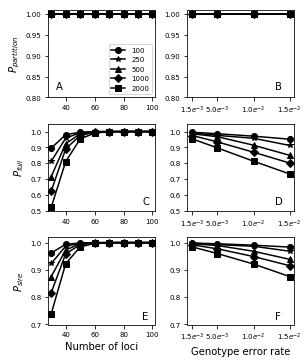

In [11]:
singtab = pd.read_csv('../data_files/singtab.csv')

fig = plt.figure(figsize=(11.2/2.54, 20/2.54))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ticksize = 7
mux = ['$1.5e^{-3}$', '$5.0e^{-3}$', "$1.0e^{-2}$","$1.5e^{-2}$"]
# Vary number of loci
yv = singtab[singtab.mu_input == 0.0015].groupby(['n_adults', 'nloci']).mean()

nlpart = fig.add_subplot(4,2,1)
nlpart.tick_params(axis='both', which='major', labelsize=ticksize)
nlpart.set_xlim(28, 102)
nlpart.set_ylim(0.8, 1.01)
nlpart.set_ylabel('$P_{partition}$')
nlpart.plot(nloci, yv.partition_found[ 0:8 ], '-ok', label='100')
nlpart.plot(nloci, yv.partition_found[ 8:16], '-*k', label='250')
nlpart.plot(nloci, yv.partition_found[16:24], '-^k', label='500')
nlpart.plot(nloci, yv.partition_found[24:32], '-Dk', label='1000')
nlpart.plot(nloci, yv.partition_found[32:40], '-sk', label='2000')
nlpart.legend(loc='lower right', fontsize=7)
#nlpart.grid(axis='y')
nlpart.annotate('A', xy = [40,1], xytext=[33,0.82])


nlsibs = fig.add_subplot(4,2,3)
nlsibs.tick_params(axis='both', which='major', labelsize=ticksize)
nlsibs.set_ylim(0.5, 1.05)
nlsibs.set_xlim(28, 102)
nlsibs.set_ylabel('$P_{full}$')
nlsibs.plot(nloci, yv.acc_fs[ 0:8 ], '-ok')
nlsibs.plot(nloci, yv.acc_fs[ 8:16], '-*k')
nlsibs.plot(nloci, yv.acc_fs[16:24], '-^k')
nlsibs.plot(nloci, yv.acc_fs[24:32], '-Dk')
nlsibs.plot(nloci, yv.acc_fs[32:40], '-sk')
#nlsibs.grid(axis='y')
nlsibs.annotate('C', xy = [95,1], xytext=[93,0.54])

nlsire = fig.add_subplot(4,2,5)
nlsire.tick_params(axis='both', which='major', labelsize=ticksize)
nlsire.set_xlim(28, 102)
nlsire.set_ylim(0.7, 1.02)
nlsire.set_xlabel('Number of loci')
nlsire.set_ylabel('$P_{sire}$')
nlsire.plot(nloci, yv.prob_sires[ 0:8 ], '-ok')
nlsire.plot(nloci, yv.prob_sires[ 8:16], '-*k')
nlsire.plot(nloci, yv.prob_sires[16:24], '-^k')
nlsire.plot(nloci, yv.prob_sires[24:32], '-Dk')
nlsire.plot(nloci, yv.prob_sires[32:40], '-sk')
#nlsire.grid(axis='y')
nlsire.annotate('E', xy = [95,1], xytext=[93,0.72])

# Vary genotype error rate
yv = singtab[singtab.nloci == 50].groupby(['n_adults', 'mu_input']).mean()

mupart = fig.add_subplot(4,2,2)
mupart.tick_params(axis='both', which='major', labelsize=ticksize)
mupart.set_ylim(0.8, 1.01)
mupart.plot(mu, yv.partition_found[ 0:4 ], '-ok')
mupart.plot(mu, yv.partition_found[ 4:8 ], '-*k')
mupart.plot(mu, yv.partition_found[ 8:12], '-^k')
mupart.plot(mu, yv.partition_found[12:16], '-Dk')
mupart.plot(mu, yv.partition_found[16:20], '-sk')
mupart.set_xticks(mu)
mupart.set_xticklabels(mux)
#mupart.grid(axis='y')
mupart.annotate('B', xy = [0.01,1], xytext=[0.013,0.82])

musibs = fig.add_subplot(4,2,4)
musibs.tick_params(axis='both', which='major', labelsize=ticksize)
musibs.set_ylim(0.5, 1.05)
musibs.plot(mu, yv.acc_fs[ 0:4 ], '-ok')
musibs.plot(mu, yv.acc_fs[ 4:8 ], '-*k')
musibs.plot(mu, yv.acc_fs[ 8:12], '-^k')
musibs.plot(mu, yv.acc_fs[12:16], '-Dk')
musibs.plot(mu, yv.acc_fs[16:20], '-sk')
musibs.set_xticks(mu)
musibs.set_xticklabels(mux)
#musibs.grid(axis='y')
musibs.annotate('D', xy = [0.01,1], xytext=[0.013,0.54])

musire = fig.add_subplot(4,2,6)
musire.tick_params(axis='both', which='major', labelsize=ticksize)
musire.set_ylim(0.7, 1.02)
musire.set_xlabel('Genotype error rate')
musire.plot(mu, yv.prob_sires[ 0:4 ], '-ok')
musire.plot(mu, yv.prob_sires[ 4:8 ], '-*k')
musire.plot(mu, yv.prob_sires[ 8:12], '-^k')
musire.plot(mu, yv.prob_sires[12:16], '-Dk')
musire.plot(mu, yv.prob_sires[16:20], '-sk')
musire.set_xticks(mu)
musire.set_xticklabels(mux)
#musire.grid(axis='y', which='both')
musire.annotate('F', xy = [0.01,1], xytext=[0.013,0.72])

plt.savefig('../figures/accuracy_singsibships.eps', bbox_inches='tight', pad_inches=0.1)

## 4. Skew

In this scenario we model reproductive skew, where one pollen donor fathers a large number of offspring and other donors father a small number of offspring. Specifically, the first father has ten offspring, and ten other fathers have one each.

In [ ]:
sires     = range(1,12)
offspring = [10] + [1]*10

np.random.seed(52)
skewtab, skewclusters = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, return_clusters=True, verbose=True)
skew_famsizes = np.array([skewclusters[i].family_size() for i in range(len(skewclusters))])
skew_famsizes = pd.DataFrame(skew_famsizes)

# save data tables
skewtab.to_csv('../data_files/skewtab.csv', index=False)
skew_famsizes.to_csv('../data_files/skew_famsizes.csv', index=False)

del skewtab, skewclusters, skew_famsizes

300 of each parameter combination will be performed.
Simulating arrays with multiple number of loci: [30, 40, 50, 60, 70, 80, 90, 100].
Drawing allele frequencies between 0.25 and 0.5.
Simulating adult populations of multiple sizes: [100, 250, 500, 1000, 2000].
Simulating 11 full-sib families.
0% of per-locus genotypes will be removed at random.
Multiple real genotyping error rates: [0.0015, 0.005, 0.01, 0.015].
Constructing paternity arrays using multiple input values for assumed genotype-error rate: [0.0015, 0.005, 0.01, 0.015].
No candidates to be removed.
Constructing paternity arrays assuming complete sampling of candidates.
Self-fertilisation rate of 0.
Performing 1000 Monte Carlo draws for sibship inference.

Parameters set. Beginning simulations on Fri Nov 17 22:55:08 2017.


Simulations completed after 363.82 minutes.


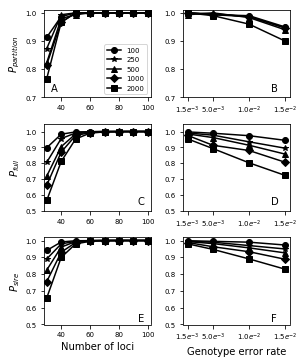

In [15]:
skewtab = pd.read_csv('../data_files/skewtab.csv')

fig = plt.figure(figsize=(11.2/2.54, 20/2.54))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ticksize = 7
mux = ['$1.5e^{-3}$', '$5.0e^{-3}$', "$1.0e^{-2}$","$1.5e^{-2}$"]
# Vary number of loci
yv = skewtab[skewtab.mu_input == 0.0015].groupby(['n_adults', 'nloci']).mean()

nlpart = fig.add_subplot(4,2,1)
nlpart.tick_params(axis='both', which='major', labelsize=ticksize)
nlpart.set_xlim(28, 102)
nlpart.set_ylim(0.7, 1.01)
nlpart.set_ylabel('$P_{partition}$')
nlpart.plot(nloci, yv.partition_found[ 0:8 ], '-ok', label='100')
nlpart.plot(nloci, yv.partition_found[ 8:16], '-*k', label='250')
nlpart.plot(nloci, yv.partition_found[16:24], '-^k', label='500')
nlpart.plot(nloci, yv.partition_found[24:32], '-Dk', label='1000')
nlpart.plot(nloci, yv.partition_found[32:40], '-sk', label='2000')
nlpart.legend(loc='lower right', fontsize=7)
#nlpart.grid(axis='y')
nlpart.annotate('A', xy = [40,1], xytext=[33,0.72])


nlsibs = fig.add_subplot(4,2,3)
nlsibs.tick_params(axis='both', which='major', labelsize=ticksize)
nlsibs.set_ylim(0.5, 1.05)
nlsibs.set_xlim(28, 102)
nlsibs.set_ylabel('$P_{full}$')
nlsibs.plot(nloci, yv.acc_fs[ 0:8 ], '-ok')
nlsibs.plot(nloci, yv.acc_fs[ 8:16], '-*k')
nlsibs.plot(nloci, yv.acc_fs[16:24], '-^k')
nlsibs.plot(nloci, yv.acc_fs[24:32], '-Dk')
nlsibs.plot(nloci, yv.acc_fs[32:40], '-sk')
#nlsibs.grid(axis='y')
nlsibs.annotate('C', xy = [95,1], xytext=[93,0.54])

nlsire = fig.add_subplot(4,2,5)
nlsire.tick_params(axis='both', which='major', labelsize=ticksize)
nlsire.set_xlim(28, 102)
nlsire.set_ylim(0.5, 1.02)
nlsire.set_xlabel('Number of loci')
nlsire.set_ylabel('$P_{sire}$')
nlsire.plot(nloci, yv.prob_sires[ 0:8 ], '-ok')
nlsire.plot(nloci, yv.prob_sires[ 8:16], '-*k')
nlsire.plot(nloci, yv.prob_sires[16:24], '-^k')
nlsire.plot(nloci, yv.prob_sires[24:32], '-Dk')
nlsire.plot(nloci, yv.prob_sires[32:40], '-sk')
#nlsire.grid(axis='y')
nlsire.annotate('E', xy = [95,1], xytext=[93,0.52])

# Vary genotype error rate
yv = skewtab[skewtab.nloci == 50].groupby(['n_adults', 'mu_input']).mean()

mupart = fig.add_subplot(4,2,2)
mupart.tick_params(axis='both', which='major', labelsize=ticksize)
mupart.set_ylim(0.7, 1.01)
mupart.plot(mu, yv.partition_found[ 0:4 ], '-ok')
mupart.plot(mu, yv.partition_found[ 4:8 ], '-*k')
mupart.plot(mu, yv.partition_found[ 8:12], '-^k')
mupart.plot(mu, yv.partition_found[12:16], '-Dk')
mupart.plot(mu, yv.partition_found[16:20], '-sk')
mupart.set_xticks(mu)
mupart.set_xticklabels(mux)
#mupart.grid(axis='y')
mupart.annotate('B', xy = [0.01,1], xytext=[0.013,0.72])

musibs = fig.add_subplot(4,2,4)
musibs.tick_params(axis='both', which='major', labelsize=ticksize)
musibs.set_ylim(0.5, 1.05)
musibs.plot(mu, yv.acc_fs[ 0:4 ], '-ok')
musibs.plot(mu, yv.acc_fs[ 4:8 ], '-*k')
musibs.plot(mu, yv.acc_fs[ 8:12], '-^k')
musibs.plot(mu, yv.acc_fs[12:16], '-Dk')
musibs.plot(mu, yv.acc_fs[16:20], '-sk')
musibs.set_xticks(mu)
musibs.set_xticklabels(mux)
#musibs.grid(axis='y')
musibs.annotate('D', xy = [0.01,1], xytext=[0.013,0.54])

musire = fig.add_subplot(4,2,6)
musire.tick_params(axis='both', which='major', labelsize=ticksize)
musire.set_ylim(0.5, 1.02)
musire.set_xlabel('Genotype error rate')
musire.plot(mu, yv.prob_sires[ 0:4 ], '-ok')
musire.plot(mu, yv.prob_sires[ 4:8 ], '-*k')
musire.plot(mu, yv.prob_sires[ 8:12], '-^k')
musire.plot(mu, yv.prob_sires[12:16], '-Dk')
musire.plot(mu, yv.prob_sires[16:20], '-sk')
musire.set_xticks(mu)
musire.set_xticklabels(mux)
#musire.grid(axis='y', which='both')
musire.annotate('F', xy = [0.01,1], xytext=[0.013,0.52])

plt.savefig('../figures/accuracy_skewsibships.eps', bbox_inches='tight', pad_inches=0.1)

## Family size plot

Replot the data for family size distributions in a single figure for the supporting information. This includes the single-family, all-half-sibs, and reproductive-skew scenarios.

## 5. Increasing family size

In [ ]:
nloci        = 50
allele_freqs = [0.25, 0.5] # draw allele frequencies 
nadults      = 250
mu           = 0.0015

np.random.seed(7861)
sires     = 4
offspring = [2,10,25,50,100]

bigtab = pd.concat([make_power(r, nloci, allele_freqs, nadults, sires, offspring[0], 0, mu, mu, verbose=False),
                    make_power(r, nloci, allele_freqs, nadults, sires, offspring[1], 0, mu, mu, verbose=False),
                    make_power(r, nloci, allele_freqs, nadults, sires, offspring[2], 0, mu, mu, verbose=False),
                    make_power(r, nloci, allele_freqs, nadults, sires, offspring[3], 0, mu, mu, verbose=False),
                    make_power(r, nloci, allele_freqs, nadults, sires, offspring[4], 0, mu, mu, verbose=False)])

# Save simulation results to disk.
bigtab.to_csv('../data_files/bigtab.csv', index=False)

del bigtab

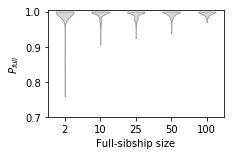

In [79]:
bigtab = pd.read_csv('../data_files/bigtab.csv')

xv = np.unique(bigtab.array_size)
yv = [bigtab.acc_fs[bigtab.array_size == xv[i]] for i in range(len(xv))]

plt.figure(figsize=(8/2.54,5/2.54))
#bp = plt.boxplot(yv)
bp = plt.violinplot(yv, showextrema=False, showmeans=False)
for pc in bp['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')

plt.xticks(range(1,6), (xv/4).astype('int'))
plt.ylim([0.7, 1.005])
plt.xlabel('Full-sibship size')
plt.ylabel('$P_{full}$')
#plt.grid(axis='y')

plt.savefig('../figures/sibship_size.eps', bbox_inches='tight', pad_inches=0.1)